In [1]:
import MatchAndPlot
import multiprocessing as mp
import multiprocessing
import os
import glob
import time
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
from numpy import inf
import matplotlib

In [2]:
def trace(m, z, a0=1.5, a1=0.3, a2=2.5, m0=0.5, m1=0.36):
    r = np.log10(1 + z)
    M = np.log10(m/1e9)
    p = M-m1-a2*r
    p[p<0] = 0
    return M - m0 + a0*r - a1*p**2

In [3]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 30
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'

In [4]:
def clean_data(array):
    array[array<0]=0
    array[array== inf]=0
    array[array== -inf]=0
    return array

In [5]:
def uvj_constants(z):
    if (z>2.0 and z<3.5):
        redshift='2.0<z<3.5'
        x1 = 1.4
        y1 = 1.3
        const = 0.59
    elif (z>1.5 and z<2.0):
        redshift='1.5<z<2.0'
        x1 = 1.5
        y1 = 1.3
        const = 0.59
    elif (z>0 and z<1.5):
        x1 = 1.6
        y1 = 1.3
        if z<0.5:
            redshift='0<z<0.5'
            const = 0.69
        elif z>0.5:
            redshift='0.5<z<1.5'
            const = 0.59
    x_right = (y1 - const) / 0.88  # right point of horizontal line
    x_horizontal = np.linspace(0, x_right, 50)  # horizontal line
    y_horizontal = np.ones(x_horizontal.size)*y1     # horizontal line
    x_diagonal = np.linspace(x_right, x1, 50)   # diagonal line
    y_diagonal = 0.88*x_diagonal + const       # diagonal line
    y_lower = y_diagonal[-1]    # lower point of vertical line
    y_vertical = np.linspace(y_lower, 4, 50)  # vertical line
    x_vertical = np.ones(y_vertical.size)*x1      # vertical line
    return redshift, x_diagonal, y_diagonal, x_horizontal, y_horizontal, x_vertical, y_vertical, const


VJ NaN
VJ NaN
0.25 : 16946
1.0 : 9357
1.75 : 460
2.25 : 221
3.0 : 496
Done in 118.9181 seconds


<Figure size 432x288 with 0 Axes>

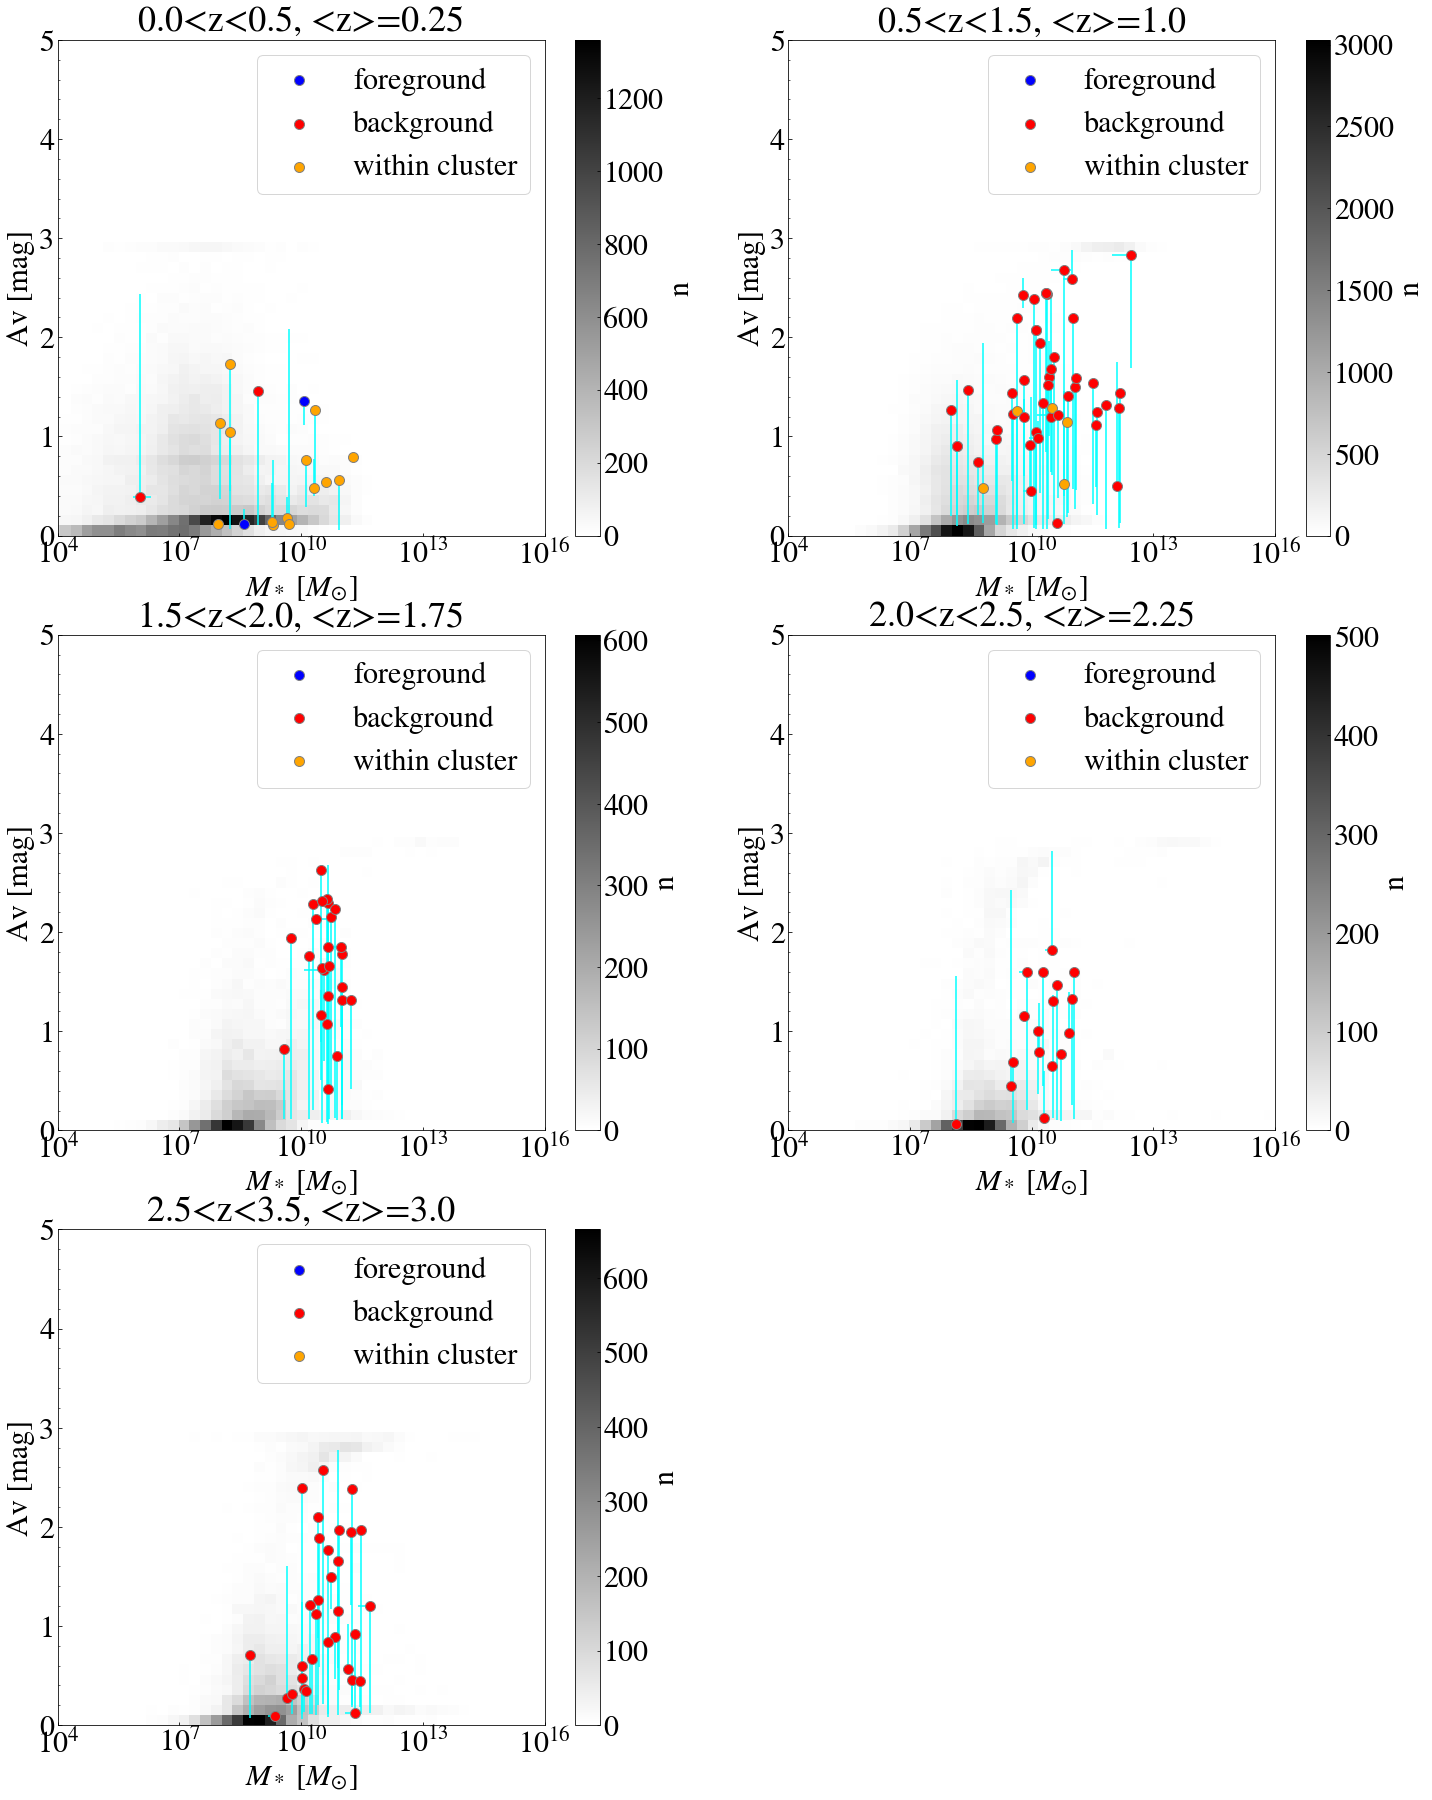

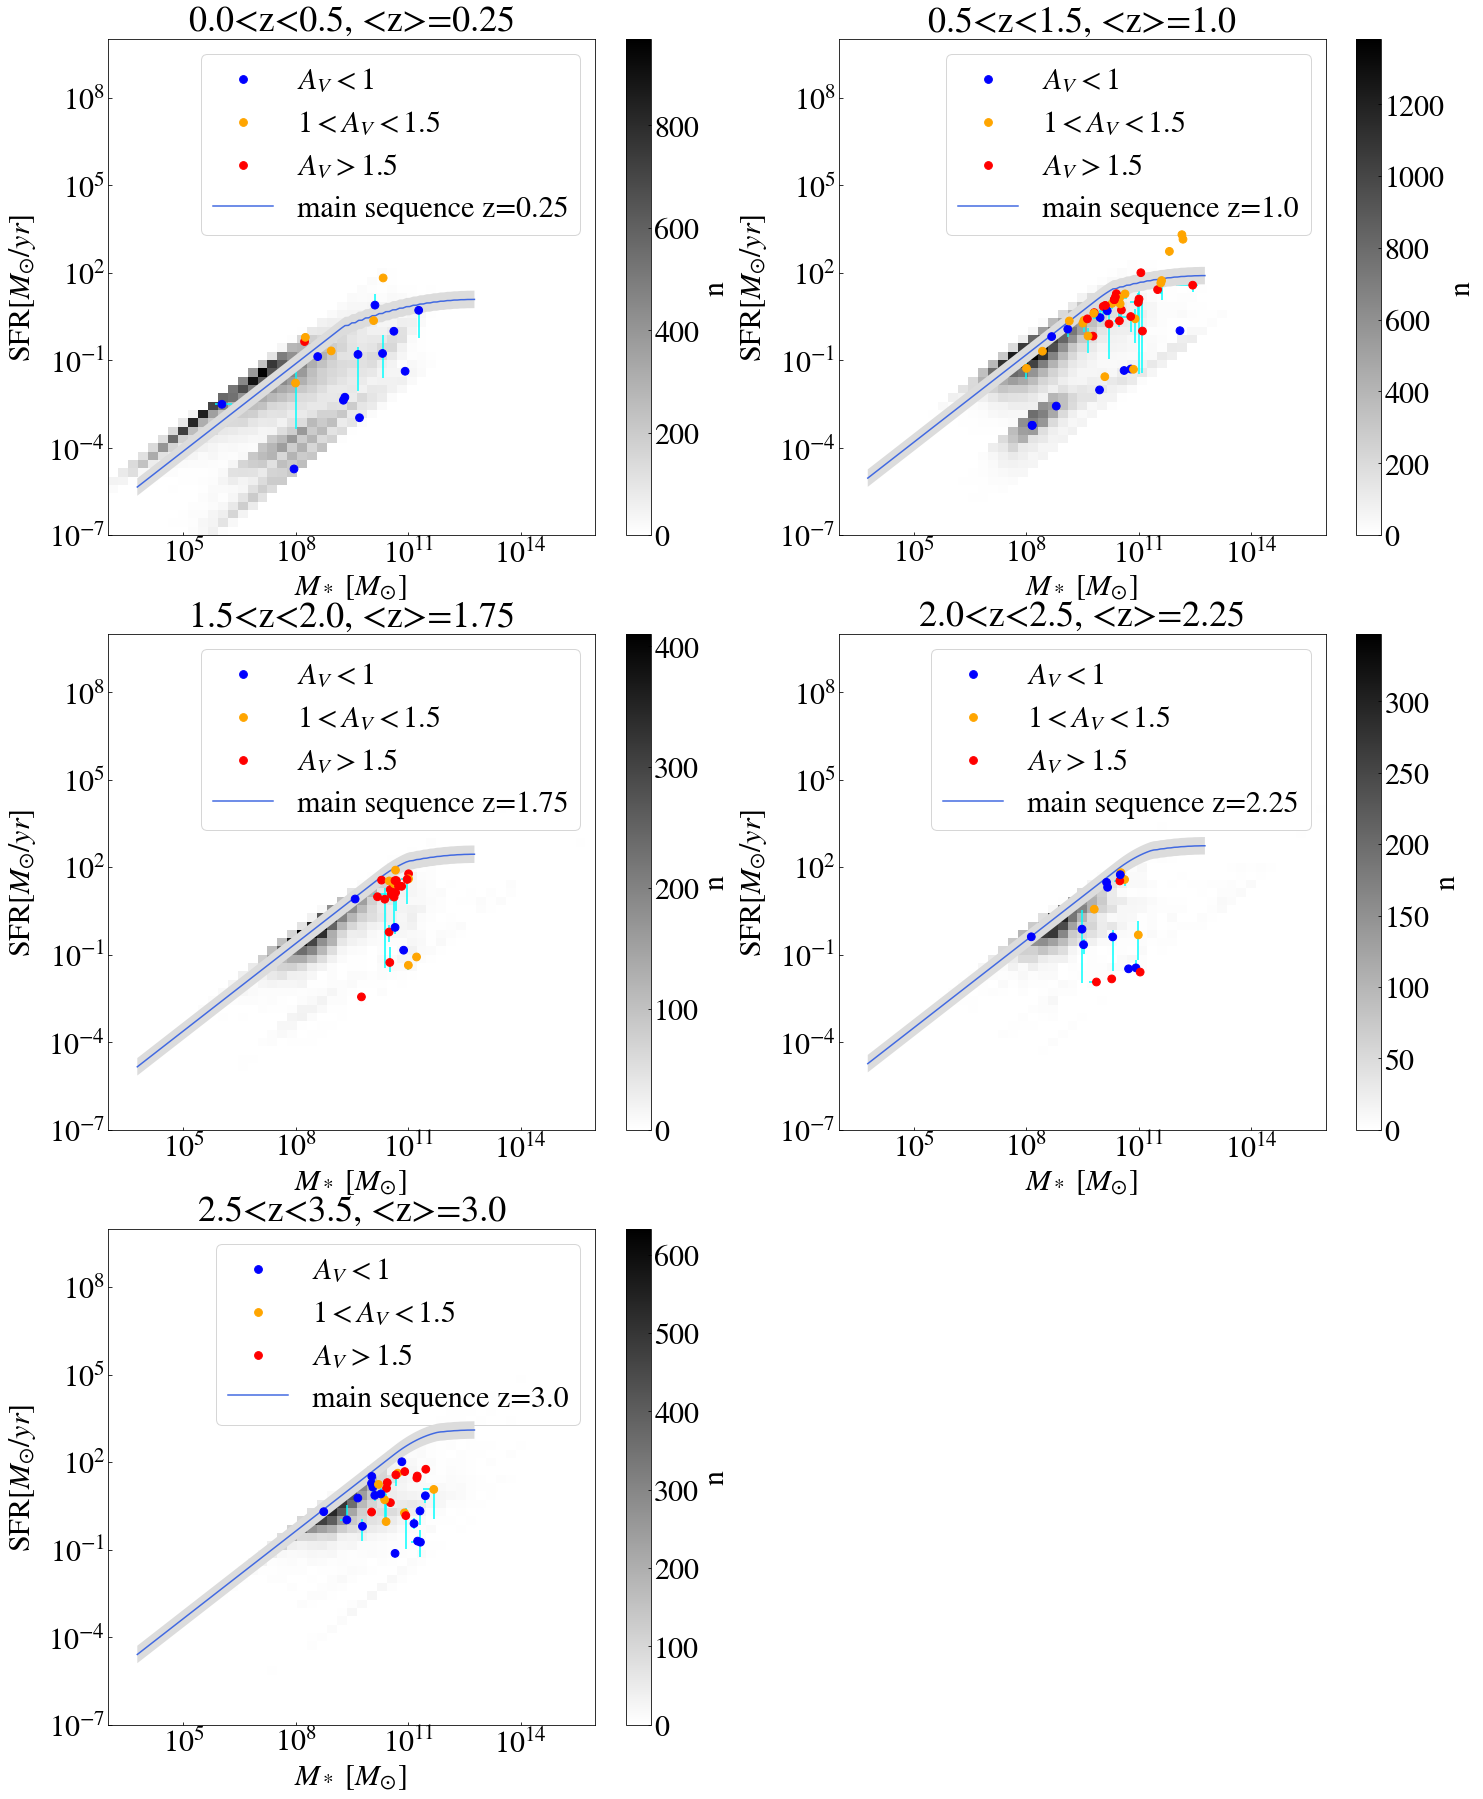

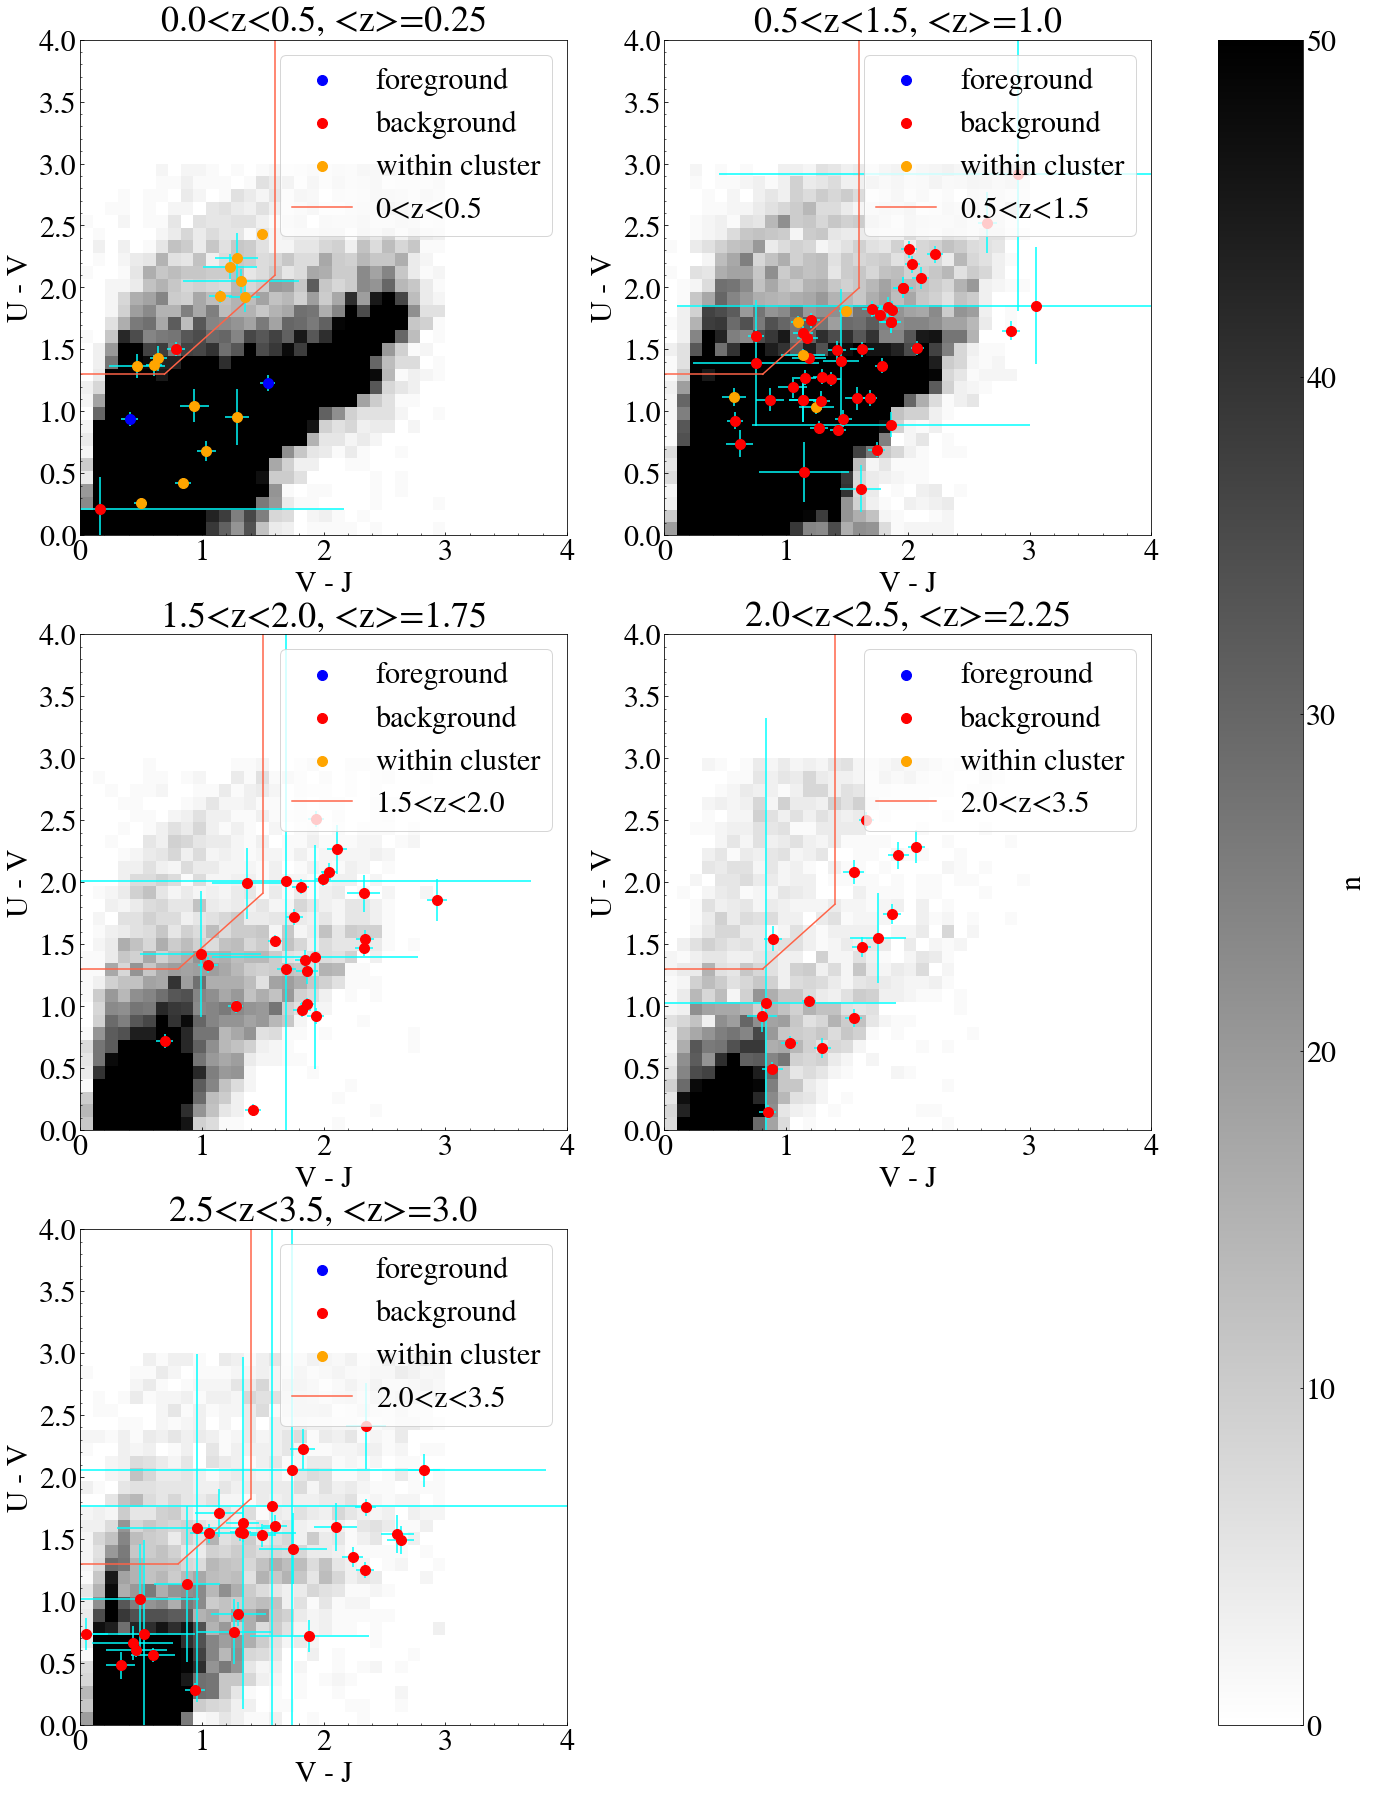

In [6]:
import warnings
from functools import partial
from matplotlib.transforms import Bbox
from multiprocessing import Process, Value, Array
'''
class NoDaemonProcess(mp.Process):
    # make 'daemon' attribute always return False
    def _get_daemon(self):
        return False
    def _set_daemon(self, value):
        pass
    daemon = property(_get_daemon, _set_daemon)

class NonDaemonPool(multiprocessing.pool.Pool):
    def Process(self, *args, **kwds):
        proc = super(NonDaemonPool, self).Process(*args, **kwds)

        class NonDaemonProcess(proc.__class__):
            """Monkey-patch process to ensure it is never daemonized"""
            @property
            def daemon(self):
                return False

            @daemon.setter
            def daemon(self, val):
                pass

        proc.__class__ = NonDaemonProcess
        return proc
'''

path2='/home/yjm/miniconda/Outputs'
files_list = glob.glob('*')
if __name__ == '__main__':
    tic = time.time()
    
    warnings.filterwarnings("ignore")
    mass2 = np.logspace(4, 13, 100)
    index=5
    mass_sorted = mass2
    fig3 = plt.figure()
    flag=True
    os.chdir(path2)
    files_list = glob.glob('*')
    fig_av,axes_av=plt.subplot_mosaic([['1','2'], ['3','4'], ['a', 'X']], empty_sentinel="X", figsize=(24, 31))
    axes_av = list(axes_av.values())
    fig_ms,axes_ms=plt.subplot_mosaic([['1','2'],[ '3','4'], ['a', 'X']], empty_sentinel="X", figsize=(24, 31))
    axes_ms = list(axes_ms.values())
    fig_uvj,axes2_uvj=plt.subplot_mosaic([['1','2'], ['3','4'],[ 'a', 'X']], empty_sentinel="X", figsize=(24, 31))
    axes_uvj = list(axes2_uvj.values())
    color='tomato'
    z_bins = np.array([[0., 0.5, 0.25],[0.5, 1.5, 1.0],[1.5, 2.0, 1.75], [2.0, 2.5, 2.25], [2.5, 3.5, 3.]])

    #pool = NonDaemonPool(3) 
    pool = mp.Pool(3)
    p = pool.map(MatchAndPlot.main_body, files_list)

    num_bins = 50
    mass=[]
    mass_detected=[]
    mass_16=[]
    mass_84=[]
    z=[]
    z_detected=[]
    z_16=[]
    z_84=[]
    Av=[]
    Av_detected=[]
    Av_16=[]
    Av_84=[]
    id_detected=[]
    sfr=[]
    sfr_detected=[]
    sfr_16=[]
    MASS_err_individual=[]
    AV_err_individual=[]
    SFR_err_individual=[]
    sfr_84=[]
    UV_err=[]
    VJ_err=[]
    UV_detected=[]
    VJ_detected=[]
    MASS_err=[]
    AV_err=[]
    SFR_err=[]
    UV=[]
    VJ=[]
    for a in p:
        if type(a) is tuple:
            (mass_, mass_16_, mass_84_, z_, Av_, av_16, av_84, sfr_, sfr_16_, sfr_84_, z_alma, UV_, VJ_, uv_err, vj_err, id_detected_, idxx, z_16_, z_84_, cluster_redshift) = a
            mass = np.append(mass, mass_)
            mass_detected = np.append(mass_detected, mass_[idxx])
            mass_16 = np.append(mass_16, mass_16_[idxx])
            mass_84 = np.append(mass_84, mass_84_[idxx])
            z = np.append(z, z_)
            z_16 = np.append(z_16, z_16_[idxx])
            z_84 = np.append(z_84, z_84_[idxx])
            z_detected = np.append(z_detected, z_[idxx])
            Av = np.append(Av, Av_)
            Av_detected = np.append(Av_detected, Av_[idxx])
            Av_16 = np.append(Av_16, av_16[idxx])
            Av_84 = np.append(Av_84, av_84[idxx])
            sfr = np.append(sfr, sfr_)
            sfr_detected = np.append(sfr_detected, sfr_[idxx])
            sfr_16 = np.append(sfr_16, sfr_16_[idxx])
            sfr_84 = np.append(sfr_84, sfr_84_[idxx])
            UV = np.append(UV, UV_)
            VJ = np.append(VJ, VJ_)
            UV_detected = np.append(UV_detected, UV_[idxx])
            VJ_detected = np.append(VJ_detected, VJ_[idxx])
            UV_err = np.append(UV_err, uv_err[idxx])
            VJ_err = np.append(VJ_err, vj_err[idxx])
            id_detected = np.append(id_detected, id_detected_)
            for i in range(index):
                coor_z = np.where((z_[idxx]>z_bins[i,0]) & (z_[idxx]<z_bins[i,1]))
                coor_z_idxx_ = reduce(np.intersect1d,(coor_z, idxx))
                coor_before2_ = np.where(z_84_[idxx][coor_z] < (cluster_redshift - 0.1))
                coor_behind2_ = np.where(z_16_[idxx][coor_z] > (cluster_redshift + 0.1))
                coor_within2_ = np.where((z_16_[idxx][coor_z] < (cluster_redshift + 0.1)) & (z_84_[idxx][coor_z] > (cluster_redshift - 0.1)))
                
                if flag:
                    axes_av[i].scatter(mass_[idxx][coor_z][coor_before2_], Av_[idxx][coor_z][coor_before2_], s=100, label='foreground', zorder=15, c='blue', edgecolors='grey')
                    axes_av[i].scatter(mass_[idxx][coor_z][coor_behind2_], Av_[idxx][coor_z][coor_behind2_], s=100, label='background', zorder=15, c='red', edgecolors='grey')
                    axes_av[i].scatter(mass_[idxx][coor_z][coor_within2_], Av_[idxx][coor_z][coor_within2_], s=100, label='within cluster', zorder=15, c='orange', edgecolors='grey')
                    '''
                    axes_ms[i].scatter(mass_[idxx][coor_z][coor_before2_], sfr_[idxx][coor_z][coor_before2_], s=100, label='foreground', zorder=15, c='blue', edgecolors='grey')
                    axes_ms[i].scatter(mass_[idxx][coor_z][coor_behind2_], sfr_[idxx][coor_z][coor_behind2_], s=100, label='background', zorder=15, c='red', edgecolors='grey')
                    axes_ms[i].scatter(mass_[idxx][coor_z][coor_within2_], sfr_[idxx][coor_z][coor_within2_], s=100, label='within cluster', zorder=15, c='orange', edgecolors='grey')
                    '''
                    axes_uvj[i].scatter(VJ_[idxx][coor_z][coor_before2_], UV_[idxx][coor_z][coor_before2_], s=100, label='foreground', zorder=15, c='blue')
                    axes_uvj[i].scatter(VJ_[idxx][coor_z][coor_behind2_], UV_[idxx][coor_z][coor_behind2_], s=100, label='background', zorder=15, c='red')
                    axes_uvj[i].scatter(VJ_[idxx][coor_z][coor_within2_], UV_[idxx][coor_z][coor_within2_], s=100, label='within cluster', zorder=15, c='orange')
                    
                else:
                    axes_av[i].scatter(mass_[idxx][coor_z][coor_before2_], Av_[idxx][coor_z][coor_before2_], s=100, zorder=15, c='blue', edgecolors='grey')
                    axes_av[i].scatter(mass_[idxx][coor_z][coor_behind2_], Av_[idxx][coor_z][coor_behind2_], s=100, zorder=15, c='red', edgecolors='grey')
                    axes_av[i].scatter(mass_[idxx][coor_z][coor_within2_], Av_[idxx][coor_z][coor_within2_], s=100, zorder=15, c='orange', edgecolors='grey')
                    '''
                    axes_ms[i].scatter(mass_[idxx][coor_z][coor_before2_], sfr_[idxx][coor_z][coor_before2_], s=100, zorder=15, c='blue', edgecolors='grey')
                    axes_ms[i].scatter(mass_[idxx][coor_z][coor_behind2_], sfr_[idxx][coor_z][coor_behind2_], s=100, zorder=15, c='red', edgecolors='grey')
                    axes_ms[i].scatter(mass_[idxx][coor_z][coor_within2_], sfr_[idxx][coor_z][coor_within2_], s=100, zorder=15, c='orange', edgecolors='grey')
                    '''
                    axes_uvj[i].scatter(VJ_[idxx][coor_z][coor_before2_], UV_[idxx][coor_z][coor_before2_], s=100, zorder=15, c='blue')
                    axes_uvj[i].scatter(VJ_[idxx][coor_z][coor_behind2_], UV_[idxx][coor_z][coor_behind2_], s=100, zorder=15, c='red')
                    axes_uvj[i].scatter(VJ_[idxx][coor_z][coor_within2_], UV_[idxx][coor_z][coor_within2_], s=100, zorder=15, c='orange')
                    
        flag = False
    id_detected = id_detected.astype('str')
    for i in range(index):
        coor_z = np.where((z_detected>z_bins[i,0]) & (z_detected<z_bins[i,1]))
        #coor_z_idxx_ = reduce(np.intersect1d,(coor_z, idxx_))
        mass_err_x = np.vstack((mass_detected[coor_z] -mass_16[coor_z], mass_84[coor_z] - mass_detected[coor_z]))
        av_err_x = np.vstack((Av_detected[coor_z] - av_16[coor_z], av_84[coor_z]-Av_detected[coor_z]))
        mass_err_x = clean_data(mass_err_x)
        mass_err_x[np.log10(mass_err_x)<0]=1
        av_err_x = clean_data(av_err_x)
        av_err_x[av_err_x<0]=0
        av_err_x[av_err_x>100]=0
        colors_av = np.chararray((Av_detected[coor_z].size, ), itemsize=7, unicode=True)
        colors_av[:] = 'blue'
        colors_av[np.where(Av_detected[coor_z]>1.5)]='red'
        colors_av[np.where((Av_detected[coor_z]<1.5) & (Av_detected[coor_z]>1))]='orange'
        #axes2[i].errorbar(1e14, 1, xerr=mass_err_x, yerr=av_err_x, c='blue', zorder=10, capsize=7)
        axes_av[i].errorbar(mass_detected[coor_z], Av_detected[coor_z], xerr=mass_err_x, yerr=av_err_x, ls='none', c='cyan')
        #mass_err_x = np.mean(mass_err_x, axis=1)
        
        sfr_err_x = np.vstack((sfr_detected[coor_z]-sfr_16[coor_z], sfr_84[coor_z]-sfr_detected[coor_z]))
        sfr_err_x = clean_data(sfr_err_x)
        #axes_ms[i].errorbar(1e14, 1e-5, xerr=np.log10(mass_err_x), yerr=np.log10(sfr_err_x), c='blue', zorder=10, capsize=7)
        axes_ms[i].scatter(mass_detected[coor_z], sfr_detected[coor_z], c=colors_av, zorder=15, s=60)
        axes_ms[i].scatter(0, -1, c='blue', label=r'$A_V<1$', s=60)
        axes_ms[i].scatter(0, -2, c='orange', label=r'$1<A_V<1.5$', s=60)
        axes_ms[i].scatter(0, -3, c='red', label=r'$A_V>1.5$', s=60)
        axes_ms[i].errorbar(mass_detected[coor_z], sfr_detected[coor_z], xerr=mass_err_x, yerr=sfr_err_x, ls='none', c='cyan')
        axes_ms[i].set_ylim(1e-10, 1e10)

        uv_err_mean = np.mean(UV_err[coor_z])
        vj_err_mean = np.mean(VJ_err[coor_z])
        
        #axes_uvj[i].scatter(VJ_detected[coor_z], UV_detected[coor_z], c=colors_av, zorder=15, s=60)
        #axes_uvj[i].scatter(0, -1, c='blue', label=r'$A_V<1$', s=60)
        #axes_uvj[i].scatter(0, -2, c='orange', label=r'$1<A_V<1.5$', s=60)
        #axes_uvj[i].scatter(0, -3, c='red', label=r'$A_V>1.5$', s=60)
        axes_uvj[i].errorbar(VJ_detected[coor_z], UV_detected[coor_z], xerr=VJ_err[coor_z], yerr=UV_err[coor_z], c='cyan',ls='none')
        '''
        for j in range(VJ_detected[coor_z].size):
            #if 'blue' in colors_av[j]:
            axes_uvj[i].text(VJ_detected[coor_z][j], UV_detected[coor_z][j], s=id_detected[coor_z][j], c='purple', fontsize=15, zorder=16)
        '''
        '''
        if i==0:    # stack error in different redshift bins
            MASS_err_individual_z1 = mass_err_x
            AV_err_individual_z1 = av_err_x
            SFR_err_individual_z1 = sfr_err_x
        else:
            MASS_err_individual = np.stack((MASS_err_individual, mass_err_x))
            AV_err_individual = np.stack((AV_err_individual, av_err_x))
            SFR_err_individual = np.stack((SFR_err_individual, sfr_err_x))
        if len(MASS_err)==0:    # stack different object
            MASS_err = MASS_err_individual
            AV_err = AV_err_individual
            SFR_err = SFR_err_individual
        else:
            MASS_err = np.hstack((MASS_err, MASS_err_individual))
            AV_err = np.hstack((AV_err, AV_err_individual))
            SFR_err = np.hstack((SFR_err, SFR_err_individual))
    '''
    for i in range(index):
        coor_z = np.where((z>z_bins[i,0]) & (z<z_bins[i,1]))
        log10_sfr_ms0 = trace(mass_sorted, z_bins[i,2])
        log10_sfr_ms0 = np.sort(log10_sfr_ms0)
        ybins = np.linspace(0, 5, num=num_bins)
        xbins = np.logspace(3, 16, num=num_bins)
        counts, _, _ = np.histogram2d(mass[coor_z], Av[coor_z], bins=(xbins, ybins))
        sc = axes_av[i].pcolormesh(xbins, ybins, counts.T, cmap='binary', zorder=0)
        cbar=plt.colorbar(sc, ax=axes_av[i])
        cbar.set_label('n')
        axes_av[i].set_xscale('log')
        axes_av[i].set_title(str(z_bins[i,0])+'<z<'+str(z_bins[i,1])+', <z>='+str(z_bins[i,2]))
        #axes_av[i].grid('on')
        axes_av[i].set_xlim(1e4, 1e16)
        axes_av[i].set_ylim(0, 5)
        axes_av[i].minorticks_on()
        axes_av[i].set_xlabel(r'$ M_*$ [$M_{\odot}$]')
        axes_av[i].set_ylabel('Av [mag]')
        axes_av[i].legend()
        
        ybins = np.logspace(-7, 7, num=num_bins)
        xbins = np.logspace(3, 16, num=num_bins)
        counts, _, _ = np.histogram2d(mass[coor_z], sfr[coor_z], bins=(xbins, ybins))
        axes_ms[i].plot(mass_sorted/1.698, 10**log10_sfr_ms0, label=('main sequence z='+str(z_bins[i,2])), c='royalblue', zorder=11)
        axes_ms[i].fill_between(mass_sorted/1.698, 10**(log10_sfr_ms0-0.3), 10**(log10_sfr_ms0+0.3), facecolor='gainsboro', zorder=10) # 10^0.23 = 1.698
        sc = axes_ms[i].pcolormesh(xbins, ybins, counts.T, cmap='binary')
        cbar=plt.colorbar(sc, ax=axes_ms[i])
        cbar.set_label('n')
        axes_ms[i].set_yscale('log')
        axes_ms[i].set_xscale('log')
        axes_ms[i].set_ylim(1e-7, )
        axes_ms[i].set_title(str(z_bins[i,0])+'<z<'+str(z_bins[i,1])+', <z>='+str(z_bins[i,2]))
        axes_ms[i].set_ylabel(r'$\mathrm{SFR} [M_{\odot} / yr]$', labelpad=10)
        axes_ms[i].set_xlabel(r'$ M_*$ [$M_{\odot}$] ')
        axes_ms[i].legend()
        #axes_ms[i].grid()
        
        
        
        ybins = np.linspace(0, 3, num=30)
        xbins = np.linspace(0, 3, num=30)
        counts, _, _ = np.histogram2d(UV[coor_z], VJ[coor_z], bins=(xbins, ybins))
        sc=axes_uvj[i].pcolormesh(xbins, ybins, counts.T, cmap='binary', vmin=0, vmax=50)
        #cbar=plt.colorbar(sc, ax=axes_uvj[i])
        #cbar.set_label('n')
        redshift, x, y, x_2, y_2, x_4, y_4, const = uvj_constants( z_bins[i,2] )
        
        coor_vj = np.where(VJ[coor_z]<x_4[0])
        coor_uv = np.where(UV[coor_z]>y_2[0])
        slope = (UV[coor_z]-const)/VJ[coor_z]
        coor_diagonal = np.where(slope>0.88)
        coor_quiescent = reduce(np.intersect1d, (coor_vj, coor_uv, coor_diagonal))
        num_quiescent = coor_quiescent.size
        print(z_bins[i,2],':',num_quiescent)
        
        axes_uvj[i].plot(x, y, color=color, label=redshift)
        axes_uvj[i].plot(x_2 ,y_2, color=color)
        axes_uvj[i].plot(x_4, y_4, color=color)
        #axes_uvj[i].grid()
        axes_uvj[i].set_title(str(z_bins[i,0])+'<z<'+str(z_bins[i,1])+', <z>='+str(z_bins[i,2]))
        axes_uvj[i].minorticks_on()
        #axes[i+8].set_ylim(,)
        axes_uvj[i].set_xlim(0,4)
        axes_uvj[i].set_ylim(0,4)
        axes_uvj[i].set_xlabel('V - J')
        axes_uvj[i].set_ylabel('U - V')
        axes_uvj[i].legend().set_zorder(16)
    
    cbar = fig_uvj.colorbar(sc, ax=axes_uvj)
    cbar.set_label('n')
    
    path3 = '/home/yjm/miniconda/PICS'
    os.chdir(path3)
    fig_av.savefig('Av-M.pdf')
    fig_ms.savefig('MS.pdf')
    fig_uvj.savefig('uvj.pdf')
    pool.close()
    pool.join()

    toc = time.time()
    print('Done in {:.4f} seconds'.format(toc-tic))

## Mass, SFR, and errors are de-magnified.